<a href="https://colab.research.google.com/github/SergeiVKalinin/MSE_Fall2023/blob/main/Module%203/7_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tutorial notebook for the Fall 2023 Course "Machine Learning for Materials Science", University of Tennessee Knoxville, Department of Materials Science and Engineering.

- Instructor Sergei V. Kalinin

- These examples are based on the Sebastian Rashka book, https://subscription.packtpub.com/book/data/9781801819312

- The atoms data set is gracefully provided by Prof. Rampi Ramprasad, Georgia Instutute of Technology

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm

import pandas as pd
import seaborn as sns

# Import Atom Dataset

In [2]:
!gdown https://drive.google.com/uc?id=1SygYRQ4Iom2ZP7dANIyay7NIoCra2bE1

Downloading...
From: https://drive.google.com/uc?id=1SygYRQ4Iom2ZP7dANIyay7NIoCra2bE1
To: /content/atoms.csv
100% 5.89k/5.89k [00:00<00:00, 21.2MB/s]


In [3]:
df = pd.read_csv('/content/atoms.csv')
df.head()

,Symbol,Atomic_radius,Covalent_radius,Density,Pauling_Electronegativity,Electron_affinity,First_Ionisation_Energy,Heat_Evaporation,Melting_Point,Boiling_Point,Specific_Heat,Specific_Volume,Thermal_Conductivity,Max_Oxidation_States
0,H,53,31,0.0708,2.20,72.769,1311.3,0.904,14.01,20.280,14.267,14.1,0.1815,1
1,He,31,28,0.1470,0.00,-50.000,2361.3,0.080,0.95,4.216,5.188,31.8,0.1520,2
2,Li,167,128,0.5340,0.98,59.632,519.9,148.000,553.69,1118.150,3.489,13.1,84.8000,1
3,Be,112,96,1.8480,1.57,-50.000,898.8,309.000,1551.00,3243.000,1.824,5.0,201.0000,2
4,B,87,84,2.3400,2.04,26.989,800.2,504.500,2573.00,3931.000,1.025,4.6,27.4000,3


# k-Means clustering

In [4]:
from sklearn.cluster import KMeans

X = df[['Melting_Point','Boiling_Point']].values
km = KMeans(n_clusters=5, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

In [5]:
y_km

array([4, 4, 1, 0, 0, 3, 4, 4, 4, 4, 1, 1, 2, 0, 4, 1, 4, 4, 1, 2, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 1, 1, 4, 4, 1, 2, 0, 3, 3, 3, 3, 3,
       0, 0, 2, 1, 2, 2, 2, 1, 4, 4, 1, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 2, 1, 0, 3, 3, 3, 3, 3, 3, 0, 0, 4, 2, 2, 2, 1], dtype=int32)

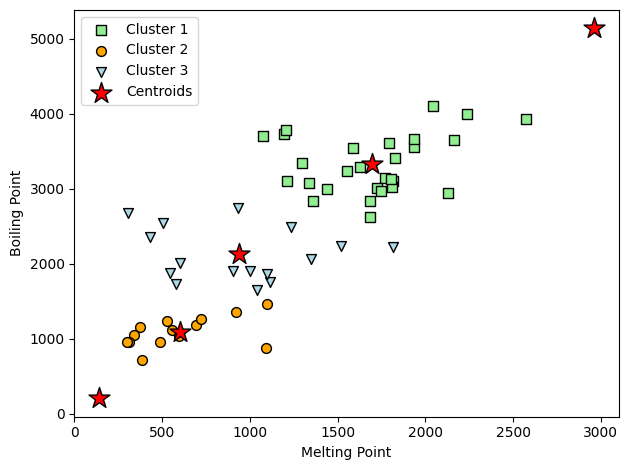

In [6]:
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='Cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, c='lightblue', marker='v', edgecolor='black', label='Cluster 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='black', label='Centroids')
plt.xlabel('Melting Point')
plt.ylabel('Boiling Point')
plt.legend(scatterpoints=1)
plt.tight_layout()
plt.show()

# Silhouette and distortions

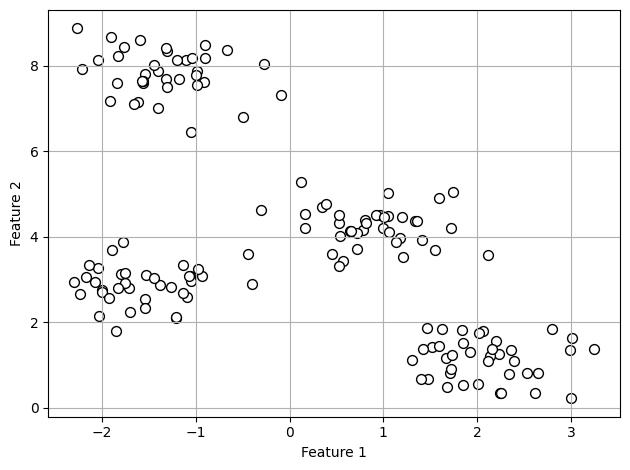

In [7]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c='white', marker='o', edgecolor='black', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.tight_layout()
plt.show()

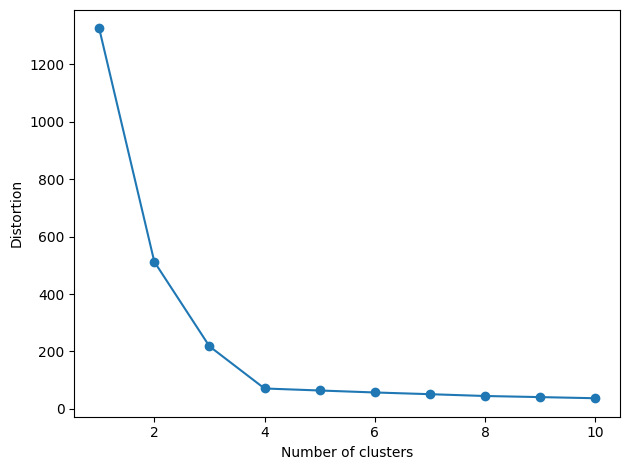

In [8]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

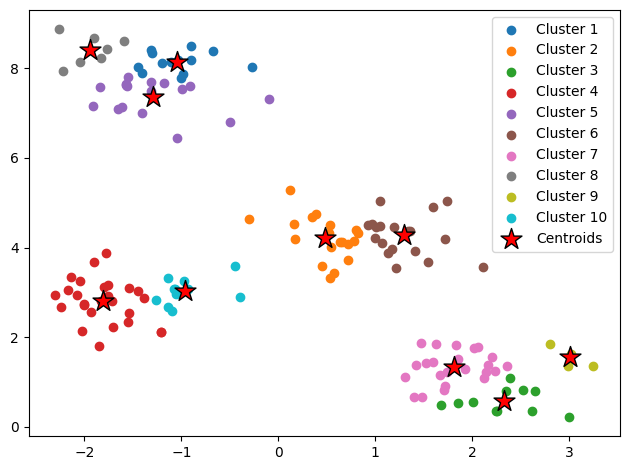

In [9]:
nc = 10
km = KMeans(n_clusters=nc, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

for i in range(nc):
  plt.scatter(X[y_km == i][:, 0], X[y_km == i][:, 1], label=f'Cluster {i + 1}')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='black', label='Centroids')
#plt.xlabel('Melting Point')
#plt.ylabel('Boiling Point')
plt.legend(scatterpoints=1)
plt.tight_layout()
plt.show()

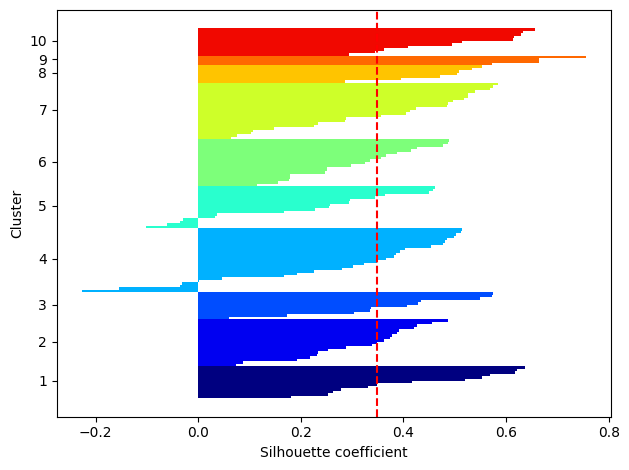

In [10]:
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

# Dendrogramm

In [11]:
from scipy.cluster.hierarchy import linkage

df_small = df[['Melting_Point','Boiling_Point']]
row_clusters = linkage(df_small.values, method='complete', metric='euclidean')

pd.DataFrame(row_clusters, columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
             index=[f'cluster {(i + 1)}' for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,7.0,8.0,5.333414,2.0
cluster 2,36.0,54.0,14.167569,2.0
cluster 3,6.0,84.0,15.351358,3.0
cluster 4,0.0,1.0,20.703036,2.0
cluster 5,17.0,86.0,30.356498,4.0
...,...,...,...,...
cluster 79,154.0,159.0,1964.169484,27.0
cluster 80,153.0,158.0,2162.890505,36.0
cluster 81,161.0,162.0,3046.567502,39.0
cluster 82,160.0,164.0,4833.409714,48.0


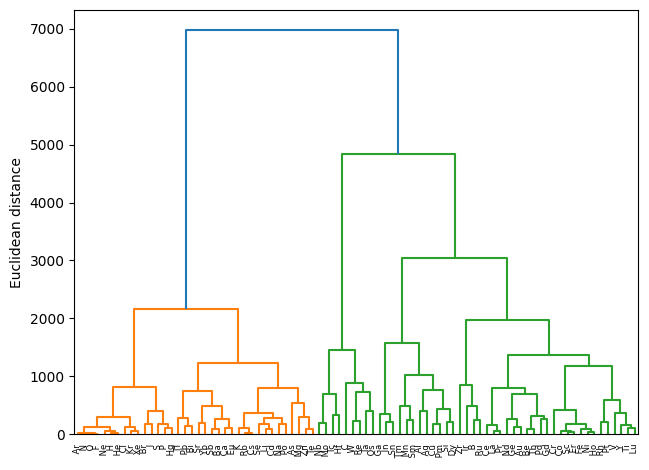

In [12]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import set_link_color_palette

#set_link_color_palette(['black'])
set_link_color_palette(None)

labels = df['Symbol'].tolist()

row_dendr = dendrogram(row_clusters, labels = labels) #color_threshold=np.inf
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

# Density-based clustering

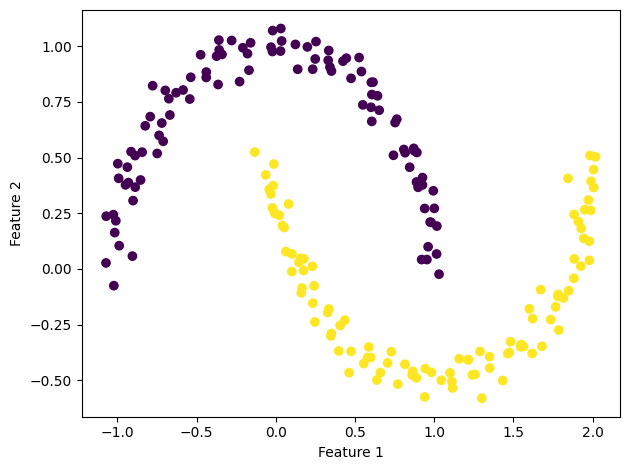

In [13]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c = y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


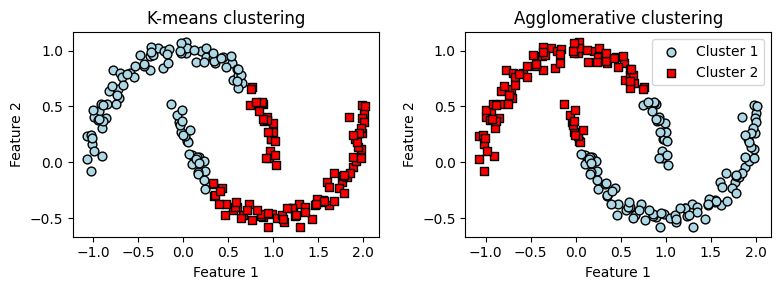

In [14]:
from sklearn.cluster import AgglomerativeClustering

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)

ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1], c='lightblue', edgecolor='black', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1], c='red', edgecolor='black', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue', edgecolor='black', marker='o', s=40, label='Cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red', edgecolor='black', marker='s', s=40,label='Cluster 2')
ax2.set_title('Agglomerative clustering')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
plt.legend()
plt.tight_layout()

plt.show()

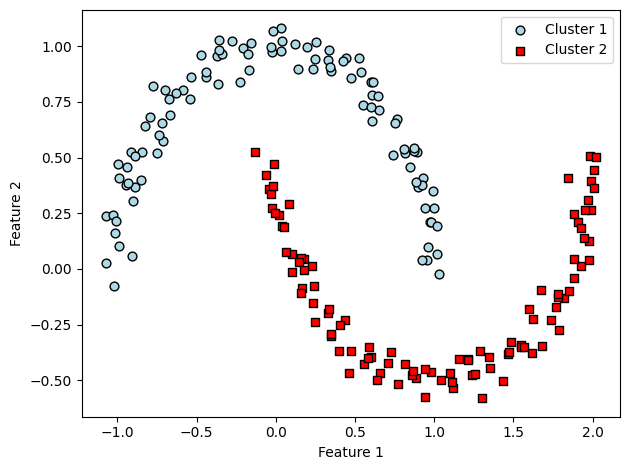

In [15]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)

plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1], c='lightblue', edgecolor='black', marker='o', s=40, label='Cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1], c='red', edgecolor='black', marker='s', s=40, label='Cluster 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.tight_layout()
plt.show()

See next lecture!